# KNMI daggegevens

https://daggegevens.knmi.nl/klimatologie/daggegevens

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [3]:
filename = 'result.txt'

In [73]:
df = pd.read_csv(filename,
                 skiprows=8,
                 skipinitialspace=True)
df.rename(columns={'# STN': 'STN'}, inplace=True)

In [74]:
df['dd'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
df['year'] = df['dd'].dt.year
df['day_of_year'] = df['dd'].dt.day_of_year
df['month_day'] = df['dd'].dt.strftime('%m-%d')

df['temp'] = df['TG'] / 10

In [75]:
df

,STN,YYYYMMDD,TG,dd,year,day_of_year,month_day,temp
0,260,20100101,-16,2010-01-01,2010,1,01-01,-1.6
1,260,20100102,-11,2010-01-02,2010,2,01-02,-1.1
2,260,20100103,-39,2010-01-03,2010,3,01-03,-3.9
3,260,20100104,-29,2010-01-04,2010,4,01-04,-2.9
4,260,20100105,-7,2010-01-05,2010,5,01-05,-0.7
...,...,...,...,...,...,...,...,...
5801,260,20251119,48,2025-11-19,2025,323,11-19,4.8
5802,260,20251120,22,2025-11-20,2025,324,11-20,2.2
5803,260,20251121,13,2025-11-21,2025,325,11-21,1.3
5804,260,20251122,16,2025-11-22,2025,326,11-22,1.6


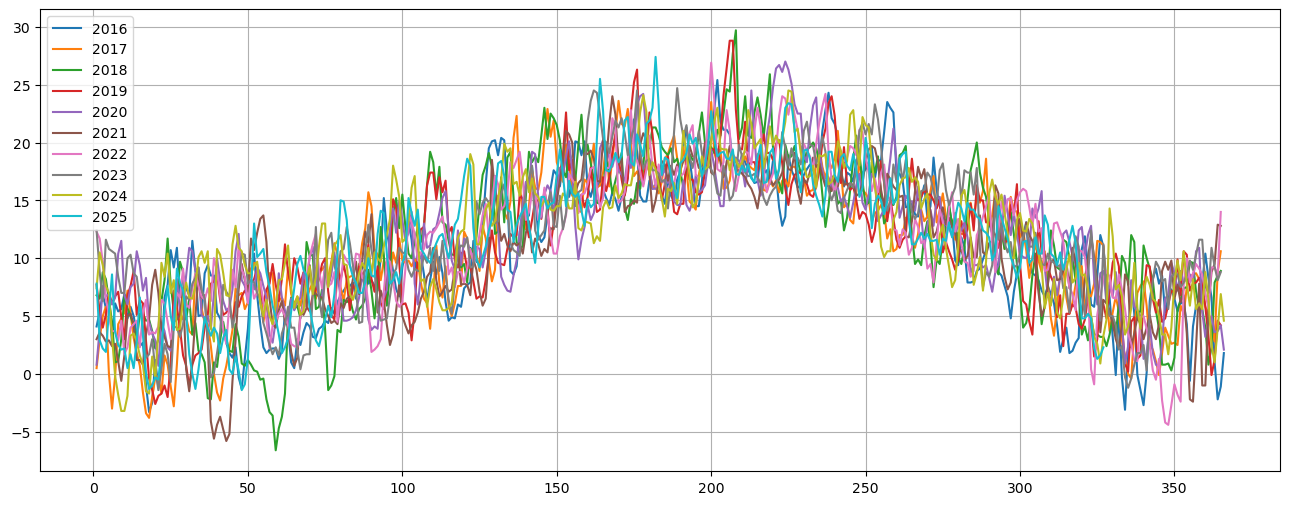

In [85]:
fig, ax = plt.subplots(figsize = (16, 6))

for year in sorted(df['year'].unique())[-10:]:
    df_selected = df.query(f'year=={year}').set_index('day_of_year')
    ax.plot(df_selected['temp'], label=year)

plt.legend()

plt.grid()
plt.show()

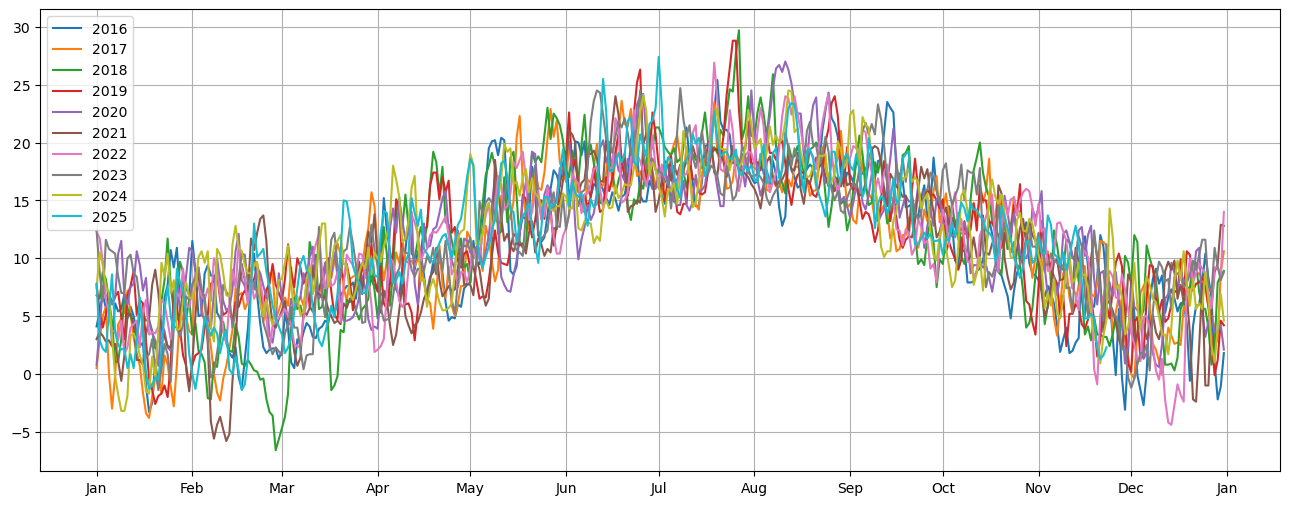

In [86]:
fig, ax = plt.subplots(figsize = (16, 6))

df['month_day'] = pd.to_datetime(dict(year=2000, month=df['dd'].dt.month, day=df['dd'].dt.day))

for year in sorted(df['year'].unique())[-10:]:
    df_selected = df.query(f'year=={year}').set_index('month_day')
    ax.xaxis.set_major_formatter(DateFormatter('%b')) 
    ax.xaxis.set_major_locator(MonthLocator()) 
    ax.plot(df_selected['temp'], label=year)

plt.legend()

plt.grid()
plt.show()

<Figure size 1600x600 with 0 Axes>

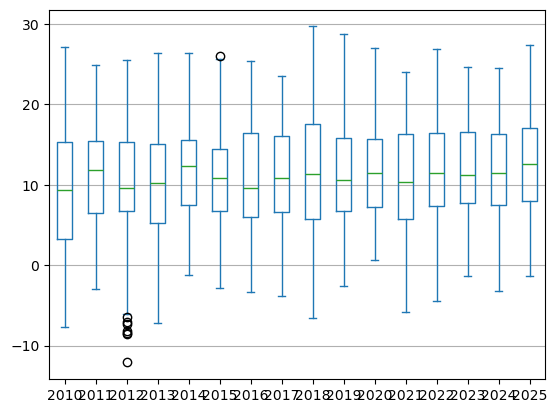

In [102]:
plt.figure(figsize = (16, 6))

df_pivot = pd.pivot(df, index='day_of_year', columns='year', values='temp')

df_pivot.plot(kind='box');

plt.grid(axis='y')